In [1]:
import pandas as pd

In [5]:
data= pd.read_csv('Resume.csv/Resume.csv')

In [7]:
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [9]:
data.tail()

,ID,Resume_str,Resume_html,Category
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2483,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [11]:
data = data.drop(['Resume_html'], axis=1)

In [13]:
data.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   Resume_str  2484 non-null   object
 2   Category    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [17]:
data.isnull().sum()

ID            0
Resume_str    0
Category      0
dtype: int64

C:\Users\yashdev\AppData\Local\Temp\ipykernel_1316\2249293372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='Category', palette='viridis')


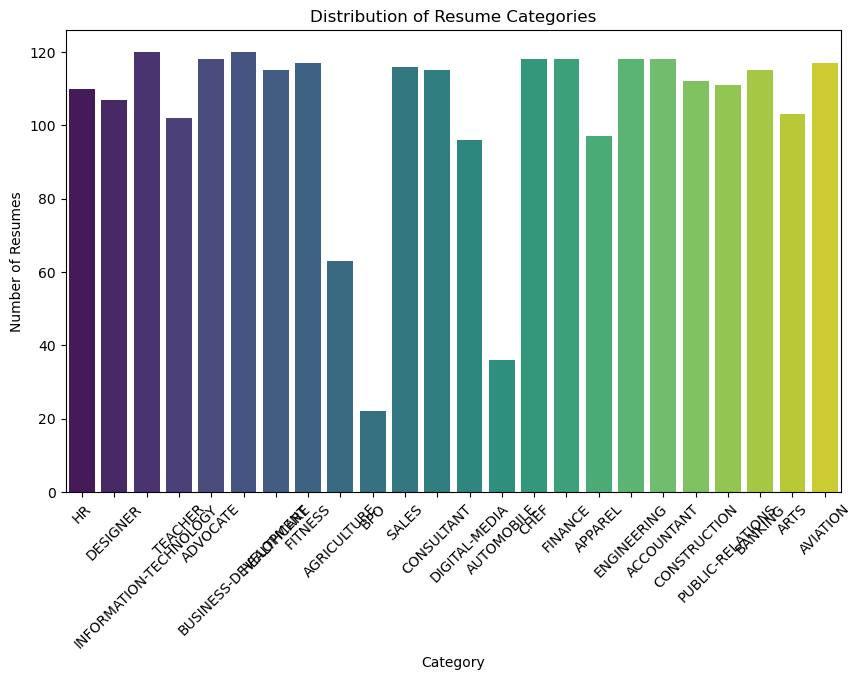

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data, x='Category', palette='viridis')
plt.title('Distribution of Resume Categories')
plt.xticks(rotation=45)
plt.ylabel('Number of Resumes')
plt.show()


In [111]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00


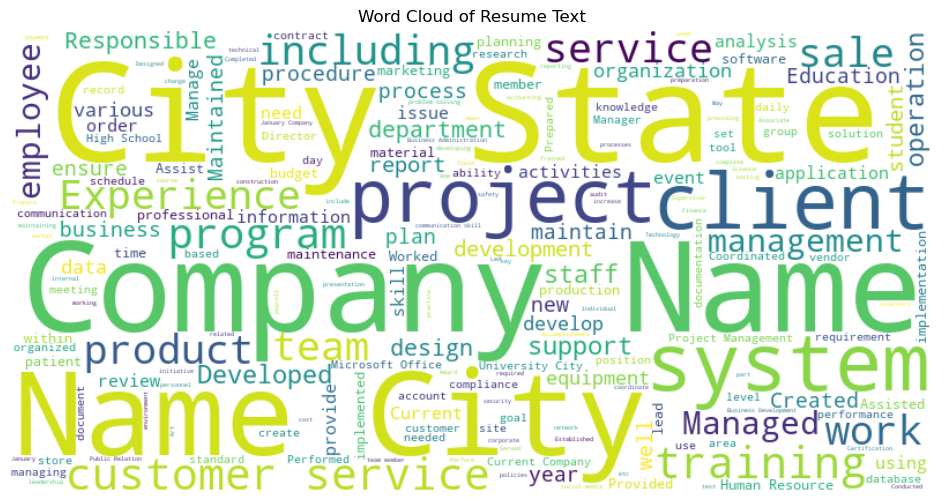

In [113]:
from wordcloud import WordCloud

# Combine all resume texts into a single string
text = ' '.join(data['Resume_str'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resume Text')
plt.show()


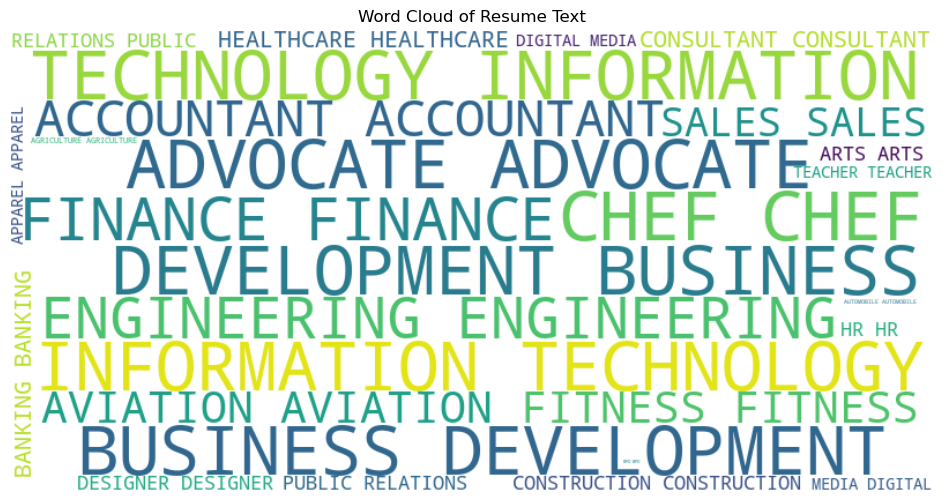

In [115]:
from wordcloud import WordCloud

# Combine all resume texts into a single string
text = ' '.join(data['Category'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resume Text')
plt.show()


In [55]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import class_weight 

In [21]:
# Function to clean the text (remove special characters, digits, etc.)
def clean_resume(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text

In [23]:
# Apply the cleaning function to the 'Resume_str' column
data['cleaned_resume'] = data['Resume_str'].apply(clean_resume)

In [25]:
data.head()

,ID,Resume_str,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,33176873,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in ...
3,27018550,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,17812897,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [27]:
data.tail()

,ID,Resume_str,Category,cleaned_resume
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgt e non commissioned officer in charge...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,government relations communications and organ...
2481,31605080,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile it supp...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highl...
2483,37473139,STOREKEEPER II Professional Sum...,AVIATION,storekeeper ii professional summary the purpo...


In [43]:
# Split the dataset into features (X) and target (y)
X = data['cleaned_resume']  # (features)
y = data['Category']        # (target)

In [45]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Convert text data into numerical data using TF-IDF vectorization
# Here we use n-grams and increase max_features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [85]:
# After fitting the TF-IDF vectorizer
tfidf.fit(X_train)
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')  # Save the vectorizer


['tfidf_vectorizer.pkl']

In [57]:
# Optionally handle class imbalance by using class_weight='balanced'
# RandomForestClassifier can automatically handle this using class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

In [59]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)

In [61]:
# Define a grid of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples to split a node
}

In [63]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [65]:
# Train the model with hyperparameter tuning
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={'ACCOUNTANT': 0.9302434456928839,
                                                            'ADVOCATE': 0.9408143939393939,
                                                            'AGRICULTURE': 1.5053030303030304,
                                                            'APPAREL': 1.0752164502164503,
                                                            'ARTS': 0.9740196078431372,
                                                            'AUTOMOBILE': 2.7597222222222224,
                                                            'AVIATION': 0.8624131944444444,
                                                            'BANKING': 0.8999094202898551,
                                                            'BPO': 4.139583333333333,
                                                            'BUSINESS-DEVELOPMEN...
                                                            'FITNESS': 0.844812925170068,
                                                            'HEALTHCARE': 0.8714912280701754,
                                                            'HR': 0.8999094202898551,
                                                            'INFORMATION-TECHNOLOGY': 0.8807624113475178,
                                                            'PUBLIC-RELATIONS': 0.8807624113475178,
                                                            'SALES': 0.9516283524904214,
                                                            'TEACHER': 1.0348958333333333},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [69]:
# Get the best model
best_model = grid_search.best_estimator_

In [71]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test_tfidf)

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.67%


In [75]:
# Display detailed classification report
print(classification_report(y_test, y_pred))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.85      1.00      0.92        29
              ADVOCATE       0.92      0.77      0.84        30
           AGRICULTURE       0.38      0.38      0.38         8
               APPAREL       0.69      0.55      0.61        20
                  ARTS       0.62      0.28      0.38        18
            AUTOMOBILE       0.50      0.33      0.40         6
              AVIATION       0.86      0.86      0.86        21
               BANKING       0.76      0.57      0.65        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.96      0.85      0.90        27
                  CHEF       0.91      0.83      0.87        24
          CONSTRUCTION       0.94      0.91      0.93        34
            CONSULTANT       0.92      0.60      0.73        20
              DESIGNER       0.85      0.89      0.87        19
         DIGITAL-MEDIA       0.92      

C:\Users\yashdev\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yashdev\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yashdev\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [77]:
import joblib
joblib.dump(best_model, 'resume_analyzer_model.pkl')

['resume_analyzer_model.pkl']

In [79]:
import joblib
model = joblib.load('resume_analyzer_model.pkl')

In [91]:
import joblib
import re

# Load the trained model
model = joblib.load('resume_analyzer_model.pkl')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to predict the category of a resume
def predict_category(resume_text):
    cleaned_text = clean_text(resume_text)  
    resume_tfidf = tfidf_vectorizer.transform([cleaned_text])
    predicted_category = model.predict(resume_tfidf)
    return predicted_category[0] 
# Example input to test the model
sample_resume_text = input("Enter a sample resume text to classify: ")
predicted_category = predict_category(sample_resume_text)

print(f"Predicted Category: {predicted_category}")


Enter a sample resume text to classify:  John Doe 123 Main St, Anytown, USA Email: johndoe@example.com Phone: (123) 456-7890  Objective: Dedicated and detail-oriented software engineer with over 5 years of experience in full-stack development. Proven ability to drive projects from concept to completion, ensuring high standards of quality and efficiency.  Education: Bachelor of Science in Computer Science Anytown University, Anytown, USA Graduated: May 2018  Experience: Software Engineer Tech Solutions Inc., Anytown, USA June 2018 - Present - Developed and maintained web applications using JavaScript, React, and Node.js. - Collaborated with cross-functional teams to define, design, and ship new features. - Conducted code reviews and provided constructive feedback to junior developers.  Intern Software Developer Innovatech, Anytown, USA Summer 2017 - Assisted in the development of a mobile application for iOS and Android platforms. - Wrote clean, maintainable code and helped with debuggi

Predicted Category: ENGINEERING


In [93]:
# Example input to test the model
sample_resume_text = input("Enter a sample resume text to classify: ")
predicted_category = predict_category(sample_resume_text)

print(f"Predicted Category: {predicted_category}")


Enter a sample resume text to classify:  Jane Smith 456 Elm St, Anytown, USA Email: janesmith@example.com Phone: (987) 654-3210  Objective: Results-driven HR professional with over 6 years of experience in talent acquisition, employee relations, and performance management. Adept at creating effective HR strategies to enhance employee engagement and support organizational goals.  Education: Bachelor of Arts in Human Resource Management Anytown University, Anytown, USA Graduated: May 2017  Experience: Human Resources Generalist ABC Corporation, Anytown, USA June 2018 - Present - Managed end-to-end recruitment processes, including job postings, screening, and interviewing candidates. - Developed and implemented HR policies and procedures to improve workforce efficiency and employee satisfaction. - Conducted onboarding and training programs for new employees, enhancing their integration into the company culture.  HR Assistant XYZ Enterprises, Anytown, USA July 2017 - May 2018 - Assisted in

Predicted Category: HR


In [117]:
# Example input to test the model
sample_resume_text = input("Enter a sample resume text to classify: ")
predicted_category = predict_category(sample_resume_text)

print(f"Predicted Category: {predicted_category}")

Enter a sample resume text to classify:  YASH DEV +91 93044 97312 yash.dev.6116@gmail.com https://github.com/yashdev6116 www.linkedin.com/in/yashdev6116 EDUCATION Vellore Institute Of Technology, AP Graduating JULY, 2025 B.Tech / Computer science and engineering with specialization in AI and ML 8.03 CGPA The Pentecostal Assembly School, Jharkhand JUNE, 2021 Central Board of Secondary Education 12th, 80.83% RELEVANT COURSEWORK Completed coursework includes Machine Learning, Deep Learning, Natural Language Processing, Data Analytics, Artificial Intelligence, Data Visualization, Python for Data Science, Advanced Algorithms, Probability and Statistics. PROJECTS Chat-Bot for mental health conversation Using NLP & ML April, 2024 GITHUB LINK ● Developed a chatbot using NLP and machine learning models for mental health support. ● Implemented Linear SVC and BERT for text classification and improved query understanding. ● Used Tf-Idf Vectorizer for feature extraction and performed model evaluati

Predicted Category: SALES
